# Importing libs

In [46]:
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


# Loading the Energy File

In [2]:
Energy_MW=pd.read_csv('./Energy/Milestone 1 Dataset/hrl_load_metered - 20170201-20200131.csv')

In [3]:
Energy_MW.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [4]:
Energy_MW.shape

(26280, 8)

# Loading the Temp File

In [5]:
Temp_Drybulb=pd.read_csv('./Energy/Milestone 1 Dataset/hr_temp_20170201-20200131_subset.csv')

In [6]:
Temp_Drybulb.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01T00:53:00,FM-15,7,37.0
1,72520514762,2017-02-01T01:53:00,FM-15,7,37.0
2,72520514762,2017-02-01T02:53:00,FM-15,7,36.0
3,72520514762,2017-02-01T03:53:00,FM-15,7,36.0
4,72520514762,2017-02-01T04:53:00,FM-15,7,36.0


In [7]:
Temp_Drybulb.shape

(26280, 5)

# Conversion of Energy date time variable to datatime64 type 

In [8]:
Energy_MW.datetime_beginning_ept=Energy_MW.datetime_beginning_ept.astype('datetime64')

In [9]:
Energy_MW.datetime_beginning_ept.dtype

dtype('<M8[ns]')

In [10]:
Energy_MW.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2017-02-01 00:00:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2017-02-01 01:00:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2017-02-01 02:00:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2017-02-01 03:00:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2017-02-01 04:00:00,RFC,WEST,DUQ,DUQ,1391.265,True


# Conversion of temp DATE variable to datatime64 type 

In [11]:
Temp_Drybulb.DATE=Temp_Drybulb.DATE.astype('datetime64')

In [12]:
Temp_Drybulb.DATE.dtype

dtype('<M8[ns]')

In [13]:
Temp_Drybulb.head()
# Temp_Drybulb.DATE.dt.strftime('%y-%m-%d %H')
# TicketsDF['submitDate'].dt.strftime('%H:%M')

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01 00:53:00,FM-15,7,37.0
1,72520514762,2017-02-01 01:53:00,FM-15,7,37.0
2,72520514762,2017-02-01 02:53:00,FM-15,7,36.0
3,72520514762,2017-02-01 03:53:00,FM-15,7,36.0
4,72520514762,2017-02-01 04:53:00,FM-15,7,36.0


# Performing left join temp and energy data frame 

In [14]:
df=pd.merge(Temp_Drybulb[['DATE','HourlyDryBulbTemperature']],Energy_MW[['datetime_beginning_ept','mw']],how='left',left_on=Temp_Drybulb.DATE.dt.strftime('%y-%m-%d %H'),right_on=Energy_MW.datetime_beginning_ept.dt.strftime('%y-%m-%d %H'))

In [15]:
df.head()

,key_0,DATE,HourlyDryBulbTemperature,datetime_beginning_ept,mw
0,17-02-01 00,2017-02-01 00:53:00,37.0,2017-02-01 00:00:00,1419.881
1,17-02-01 01,2017-02-01 01:53:00,37.0,2017-02-01 01:00:00,1379.505
2,17-02-01 02,2017-02-01 02:53:00,36.0,2017-02-01 02:00:00,1366.106
3,17-02-01 03,2017-02-01 03:53:00,36.0,2017-02-01 03:00:00,1364.453
4,17-02-01 04,2017-02-01 04:53:00,36.0,2017-02-01 04:00:00,1391.265


In [16]:
df.shape

(26283, 5)

# Dropping the unwanted features and  null values 

In [17]:
df= df.drop(columns=['key_0','datetime_beginning_ept'])

In [18]:
# df=df.dropna()
df.head()

,DATE,HourlyDryBulbTemperature,mw
0,2017-02-01 00:53:00,37.0,1419.881
1,2017-02-01 01:53:00,37.0,1379.505
2,2017-02-01 02:53:00,36.0,1366.106
3,2017-02-01 03:53:00,36.0,1364.453
4,2017-02-01 04:53:00,36.0,1391.265


# Adding the hour,week,month and year features to data frame 

In [19]:
df=df.rename(columns={'HourlyDryBulbTemperature':'temp','DATE':'Date'})

df=df.reindex(columns=['Date','mw','temp'])
df.head()

,Date,mw,temp
0,2017-02-01 00:53:00,1419.881,37.0
1,2017-02-01 01:53:00,1379.505,37.0
2,2017-02-01 02:53:00,1366.106,36.0
3,2017-02-01 03:53:00,1364.453,36.0
4,2017-02-01 04:53:00,1391.265,36.0


In [20]:
df['hour']=df.Date.dt.hour
df['weekday']=df.Date.dt.weekday
df['momth']=df.Date.dt.month
df['year']=df.Date.dt.year
df.head()

,Date,mw,temp,hour,weekday,momth,year
0,2017-02-01 00:53:00,1419.881,37.0,0,2,2,2017
1,2017-02-01 01:53:00,1379.505,37.0,1,2,2,2017
2,2017-02-01 02:53:00,1366.106,36.0,2,2,2,2017
3,2017-02-01 03:53:00,1364.453,36.0,3,2,2,2017
4,2017-02-01 04:53:00,1391.265,36.0,4,2,2,2017


# Set Date ad index 

In [21]:
df.Date.dtype

dtype('<M8[ns]')

In [22]:
df = df.set_index(['Date'])

In [24]:
df.head()

,mw,temp,hour,weekday,momth,year
Date,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,2,2,2017


In [139]:
df.tail()

,mw,temp,hour,weekday,momth,year
Date,,,,,,
2020-01-31 19:53:00,1618.484,34.0,19,4,1,2020
2020-01-31 20:53:00,1580.925,33.0,20,4,1,2020
2020-01-31 21:53:00,1545.354,33.0,21,4,1,2020
2020-01-31 22:53:00,1478.832,33.0,22,4,1,2020
2020-01-31 23:53:00,1405.188,34.0,23,4,1,2020


# Interpolate the  missing values to nearest ones 

In [32]:
df= df.interpolate(method='nearest')

In [33]:
df.isna().values.sum()

0

In [138]:
df['2017-02-01 00:53:00' : '2019-12-31 23:59:59']

,mw,temp,hour,weekday,momth,year
Date,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,2,2,2017
...,...,...,...,...,...,...
2019-12-31 19:53:00,1606.134,32.0,19,1,12,2019
2019-12-31 20:53:00,1565.014,32.0,20,1,12,2019
2019-12-31 21:53:00,1515.905,32.0,21,1,12,2019


# Train and Test data split 

In [140]:
# from datetime import datetime as dt
# train_size = '2017-02-01 00:53:00' : '2019-12-31 23:59:59'

# train_size = dt.strptime(dt_str, '%Y-%m-%d %H:%M:%S')

# # train_size=pd.to_datetime(train_size,format='%Y%m%d%')
# type(train_size)
df_train=df['2017-02-01 00:53:00' : '2019-12-31 23:59:59']
df_test=df['2019-12-31 23:59:59': '2020-01-31 23:53:00']

In [141]:
df_train.shape

(25539, 6)

In [142]:
df_test.shape

(744, 6)

In [143]:
print('Train', df_train,sep='\n')

Train
                           mw  temp  hour  weekday  momth  year
Date                                                           
2017-02-01 00:53:00  1419.881  37.0     0        2      2  2017
2017-02-01 01:53:00  1379.505  37.0     1        2      2  2017
2017-02-01 02:53:00  1366.106  36.0     2        2      2  2017
2017-02-01 03:53:00  1364.453  36.0     3        2      2  2017
2017-02-01 04:53:00  1391.265  36.0     4        2      2  2017
...                       ...   ...   ...      ...    ...   ...
2019-12-31 19:53:00  1606.134  32.0    19        1     12  2019
2019-12-31 20:53:00  1565.014  32.0    20        1     12  2019
2019-12-31 21:53:00  1515.905  32.0    21        1     12  2019
2019-12-31 22:53:00  1474.519  30.0    22        1     12  2019
2019-12-31 23:53:00  1421.717  30.0    23        1     12  2019

[25539 rows x 6 columns]


In [144]:
print('Test', df_test,sep='\n')

Test
                           mw  temp  hour  weekday  momth  year
Date                                                           
2020-01-01 00:53:00  1363.428  31.0     0        2      1  2020
2020-01-01 01:53:00  1335.975  29.0     1        2      1  2020
2020-01-01 02:53:00  1296.817  30.0     2        2      1  2020
2020-01-01 03:53:00  1288.403  30.0     3        2      1  2020
2020-01-01 04:53:00  1292.263  31.0     4        2      1  2020
...                       ...   ...   ...      ...    ...   ...
2020-01-31 19:53:00  1618.484  34.0    19        4      1  2020
2020-01-31 20:53:00  1580.925  33.0    20        4      1  2020
2020-01-31 21:53:00  1545.354  33.0    21        4      1  2020
2020-01-31 22:53:00  1478.832  33.0    22        4      1  2020
2020-01-31 23:53:00  1405.188  34.0    23        4      1  2020

[744 rows x 6 columns]


# 2nd Task - Exploring/visualizing energy and temperature data

# Energy plot across traning time 

Text(0.5, 0, 'Date')

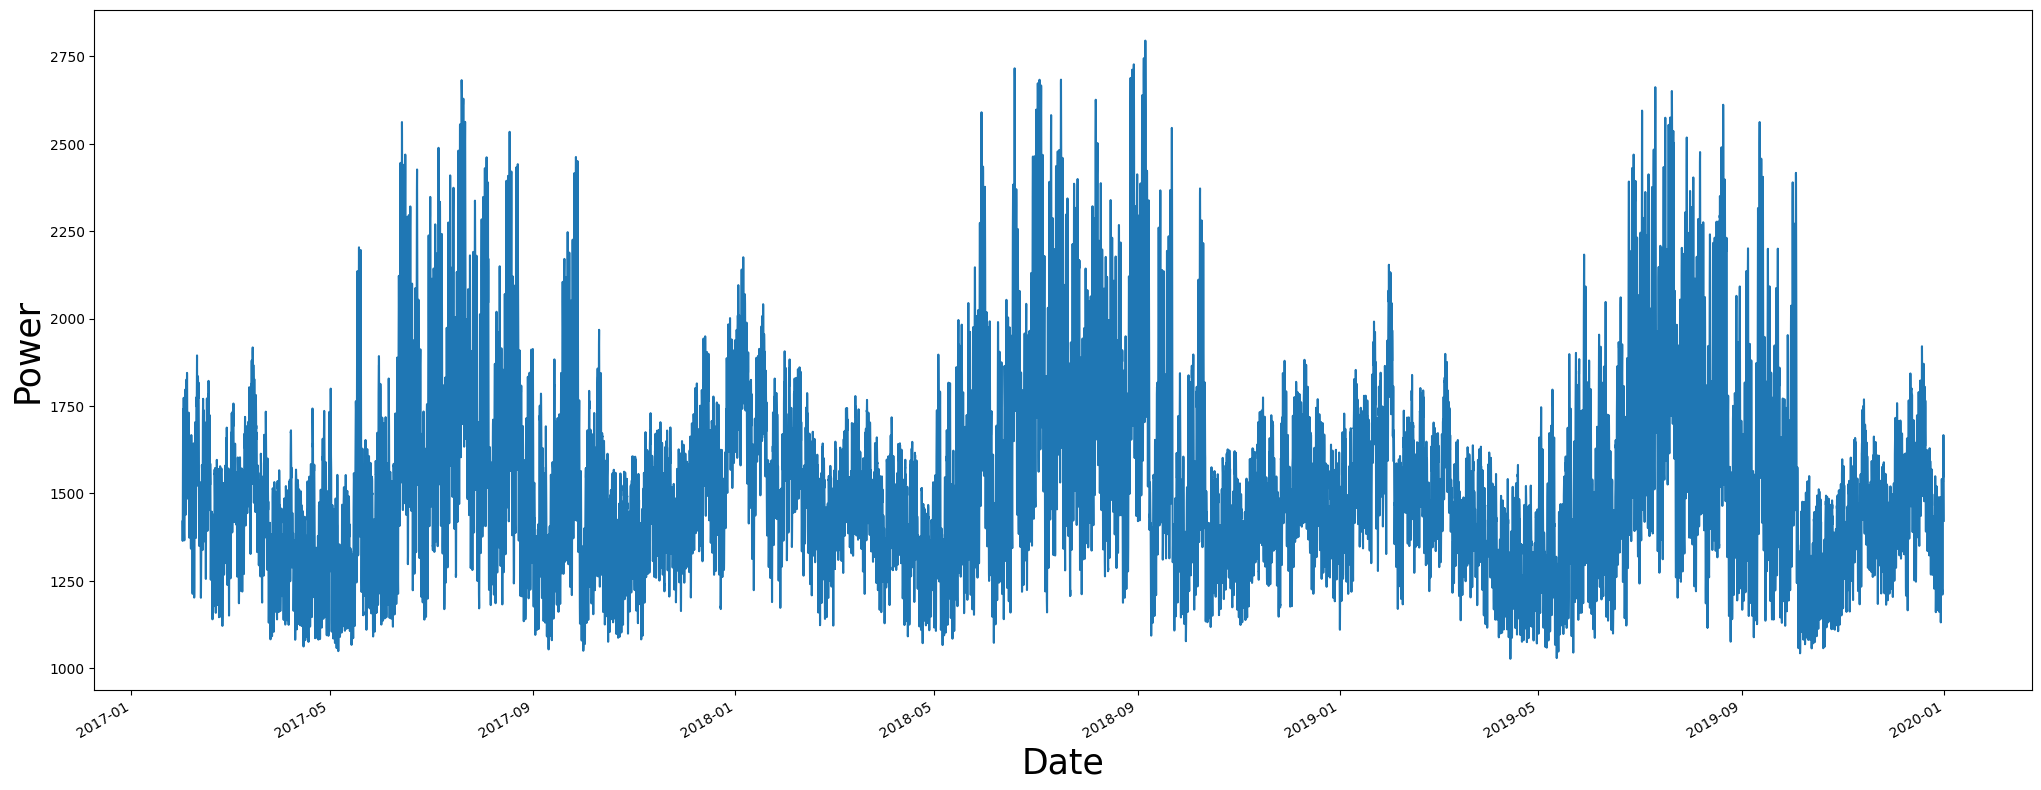

In [162]:
df_train.mw.plot(figsize=(25,10))
plt.ylabel('Power',size=25)
plt.xlabel('Date',size=25)


# Energy plot vs week 

Text(0.5, 0, 'Date')

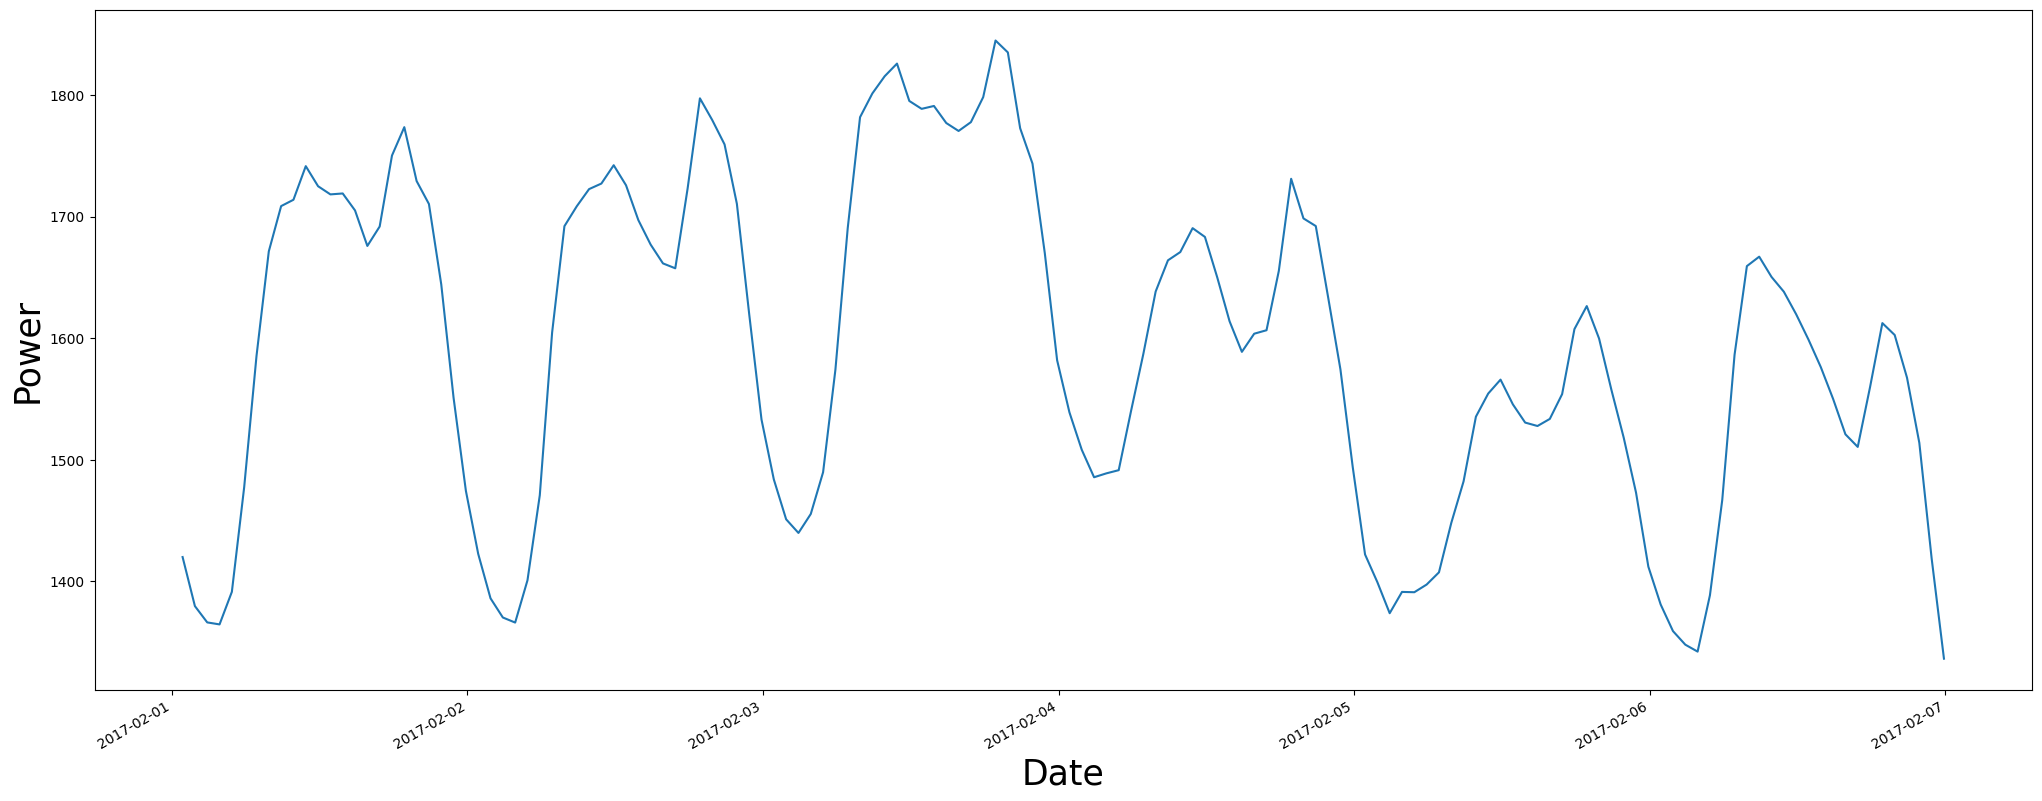

In [173]:
df_train.loc['2017-02-01 00:00:00':'2017-02-07 00:00:00',"mw"].plot(figsize=(25,10))
plt.ylabel('Power',size=25)
plt.xlabel('Date',size=25)


# Energyplot vs Month

Text(0.5, 0, 'Date')

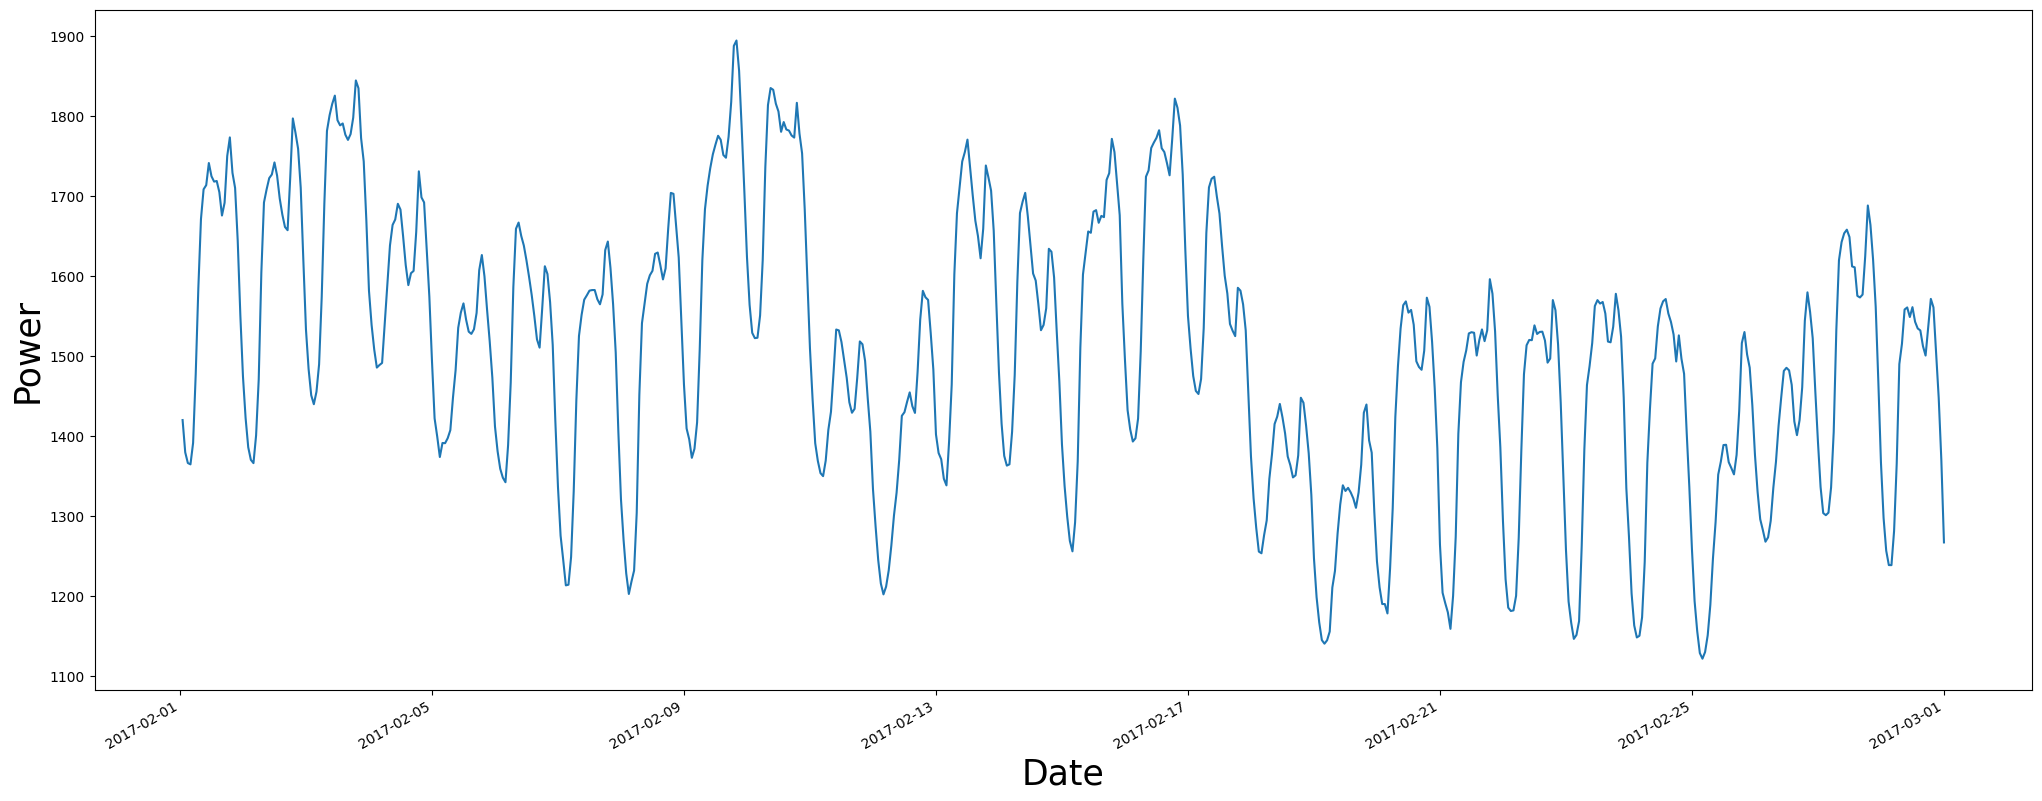

In [175]:
df_train.loc['2017-02-01 00:00:00':'2017-03-01 00:00:00',"mw"].plot(figsize=(25,10))
plt.ylabel('Power',size=25)
plt.xlabel('Date',size=25)


# Energy plot vs year

Text(0.5, 0, 'Date')

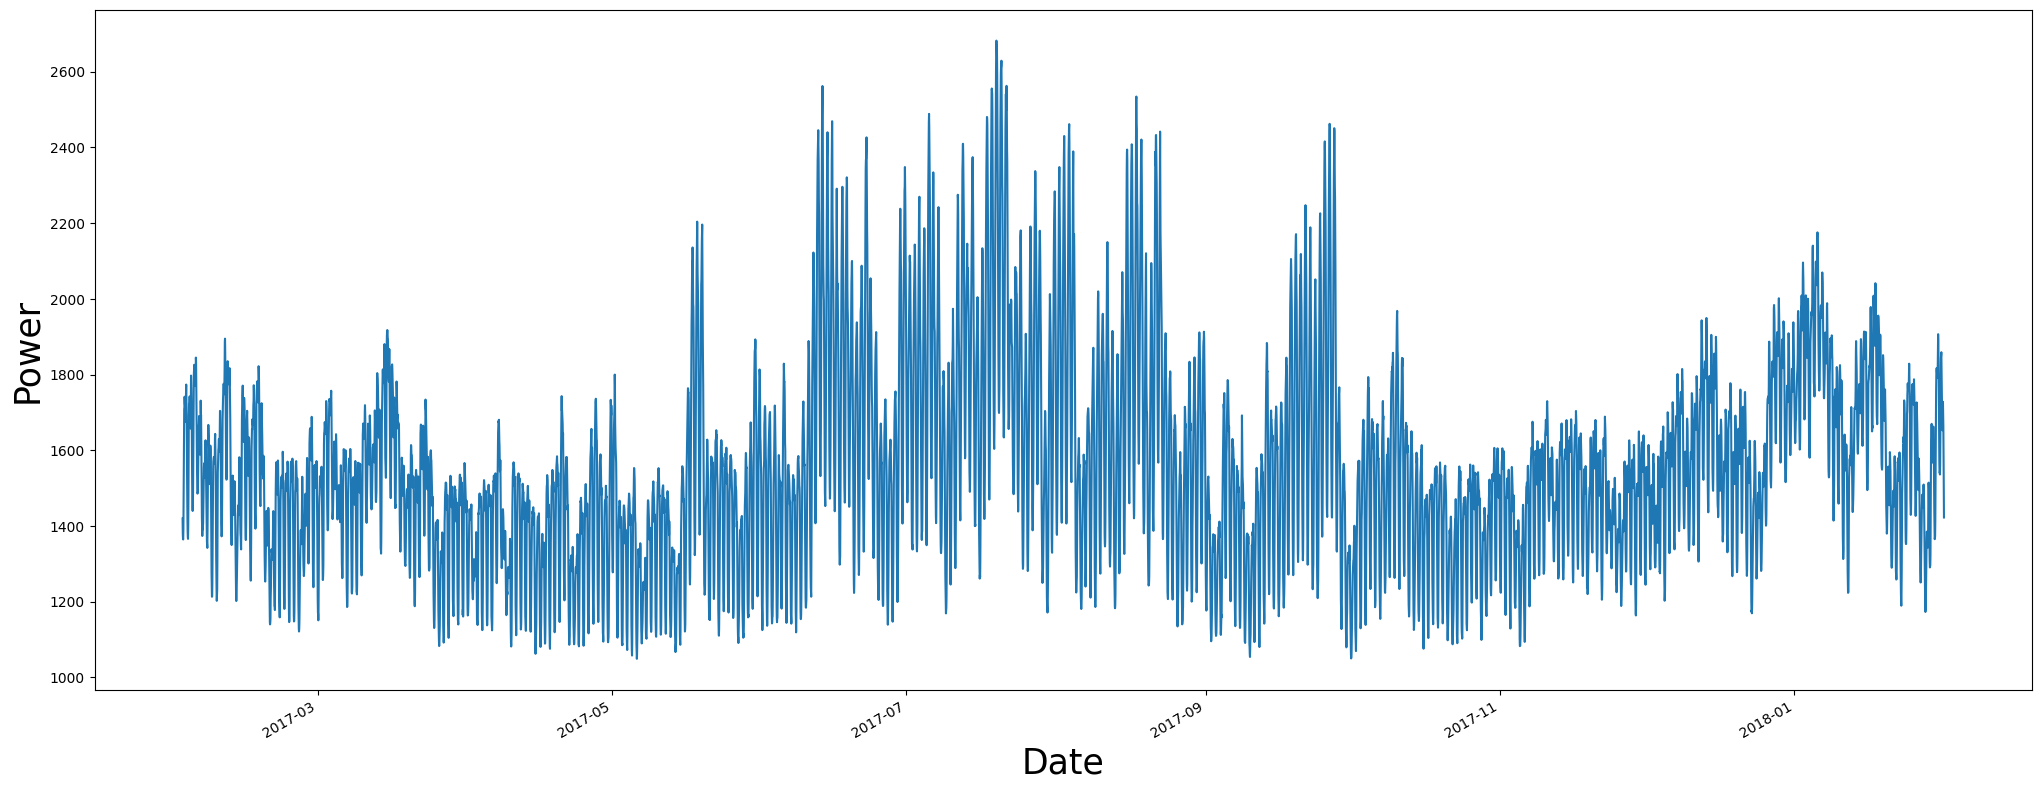

In [176]:
df_train.loc['2017-02-01 00:00:00':'2018-02-01 00:00:00',"mw"].plot(figsize=(25,10))
plt.ylabel('Power',size=25)
plt.xlabel('Date',size=25)

# Temp plot across traning time 

Text(0.5, 0, 'Date')

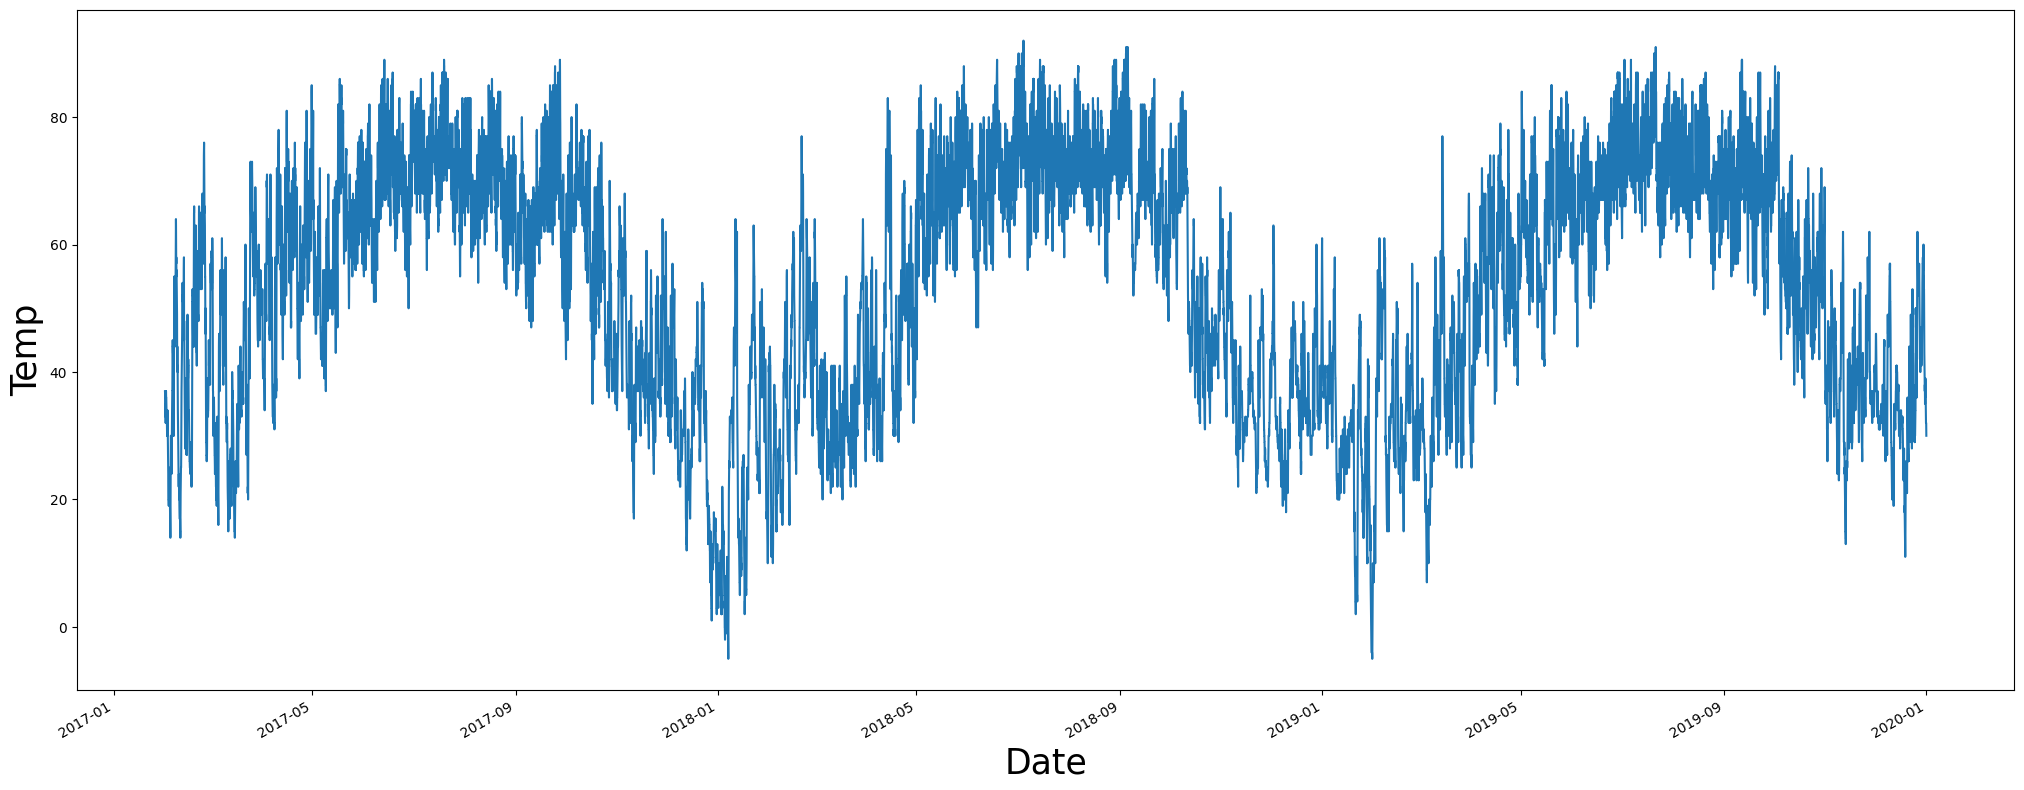

In [177]:
df_train.temp.plot(figsize=(25,10))
plt.ylabel('Temp',size=25)
plt.xlabel('Date',size=25)


# Energy plot vs week 

Text(0.5, 0, 'Date')

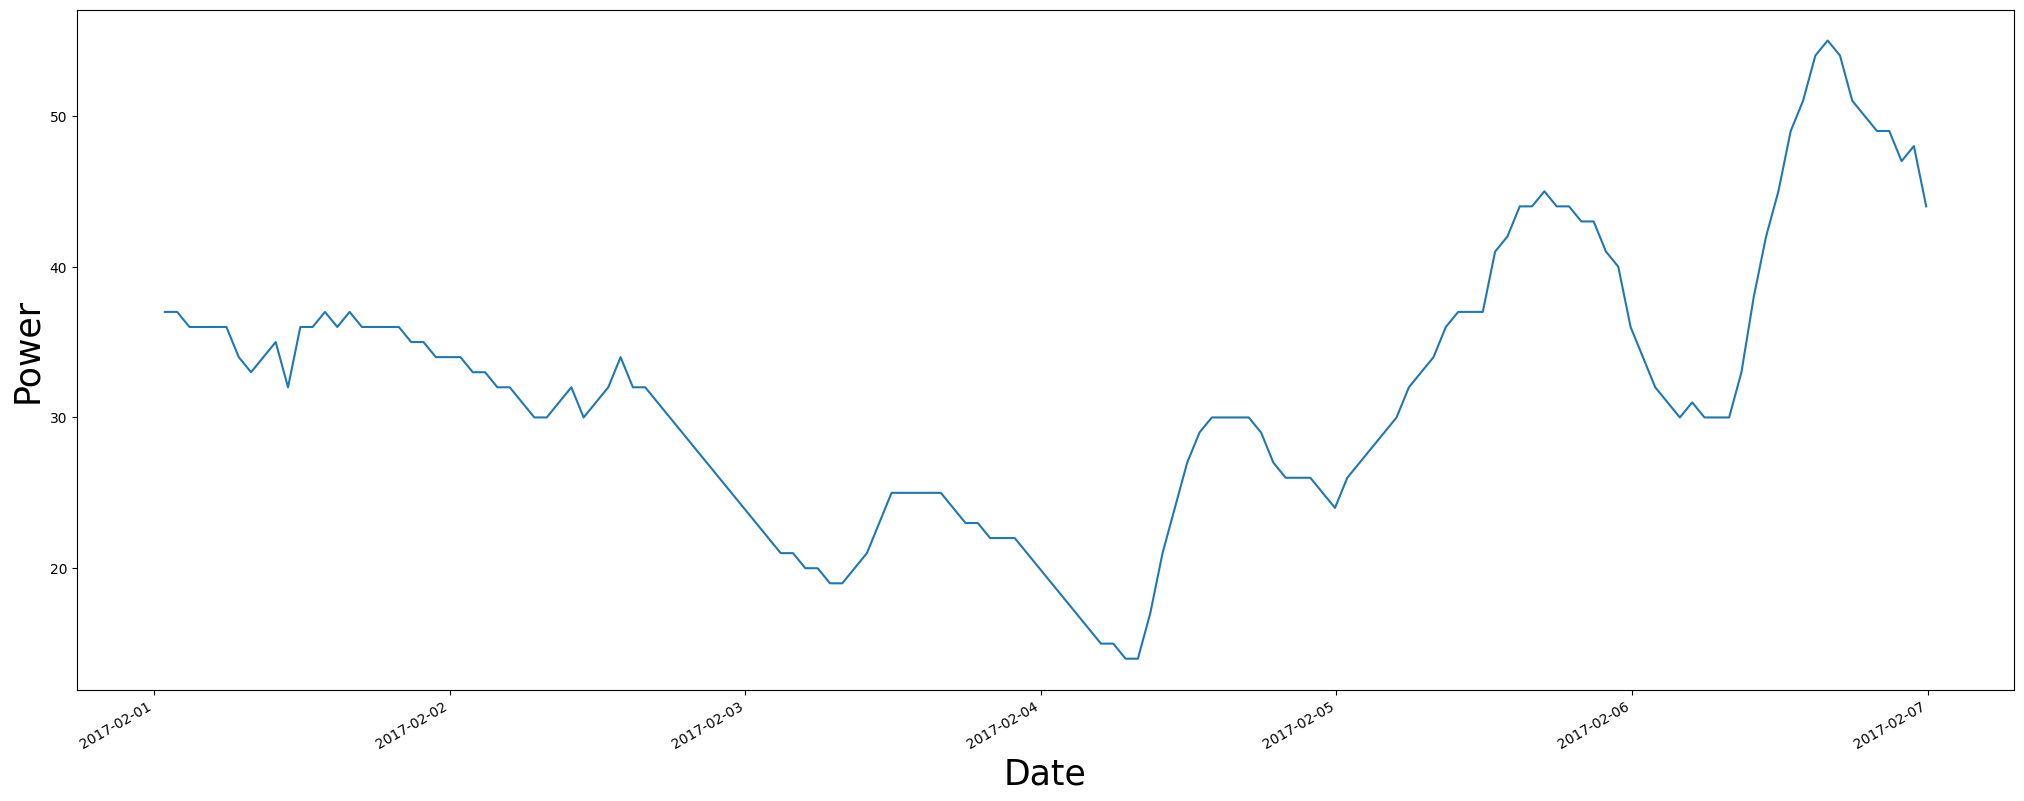

In [178]:
df_train.loc['2017-02-01 00:00:00':'2017-02-07 00:00:00',"temp"].plot(figsize=(25,10))
plt.ylabel('Power',size=25)
plt.xlabel('Date',size=25)
